In [2]:
import mmcv
from mmcv.runner import load_checkpoint

In [1]:
from mmdet.apis import inference_detector, show_result_pyplot
from mmrotate.models import build_detector

c:\Users\CanAliYarman\.conda\envs\lsknet\lib\site-packages\mmcv\__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
c:\Users\CanAliYarman\.conda\envs\lsknet\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
config_file = 'configs\custom\lsknet_custom.py'
checkpoint_file = 'work_dirs\lsknet_custom\latest.pth'


# Set the device to be used for evaluation
device='cuda:0'

# Load the config
config = mmcv.Config.fromfile(config_file)
# Set pretrained to be None since we do not need pretrained model here
config.model.pretrained = None

# Initialize the detector
model = build_detector(config.model)

# Load checkpoint
checkpoint = load_checkpoint(model, checkpoint_file, map_location=device)

# Set the classes of models for inference
model.CLASSES = checkpoint['meta']['CLASSES']

# We need to set the model's cfg for inference
model.cfg = config

# Convert the model to GPU
model.to(device)
# Convert the model into evaluation mode
model.eval()

c:\Users\CanAliYarman\.conda\envs\lsknet\lib\site-packages\mmdet\models\dense_heads\anchor_head.py:116: UserWarning: DeprecationWarning: `num_anchors` is deprecated, for consistency or also use `num_base_priors` instead
  warnings.warn('DeprecationWarning: `num_anchors` is deprecated, '
c:\Users\CanAliYarman\.conda\envs\lsknet\lib\site-packages\mmcv\runner\checkpoint.py:334: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user v

load checkpoint from local path: work_dirs\lsknet_custom\latest.pth


OrientedRCNN(
  (backbone): LSKNet(
    (patch_embed1): OverlapPatchEmbed(
      (proj): Conv2d(3, 64, kernel_size=(7, 7), stride=(4, 4), padding=(3, 3))
      (norm): SyncBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (block1): ModuleList(
      (0): Block(
        (norm1): SyncBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (norm2): SyncBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (attn): Attention(
          (proj_1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (activation): GELU(approximate='none')
          (spatial_gating_unit): LSKblock(
            (conv0): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), groups=64)
            (conv_spatial): Conv2d(64, 64, kernel_size=(7, 7), stride=(1, 1), padding=(9, 9), dilation=(3, 3), groups=64)
            (conv1): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (conv2): C

In [4]:
#img = 'C:/Users/CanAliYarman/Downloads/test-20240807T174834Z-001/test/images/UTLPOLE_38-9587896496459_-77-0126941075809_png.rf.34bb1f01c188faea624e1b4dfa4ee1d8.jpg'
img = 'C:/Users/CanAliYarman/Documents/MMrot/ETDII/test/images/5e690e4824a84c85b5a09a8b2fdd0ffc.png'  # or img = mmcv.imread(img), which will only load it once
result = inference_detector(model, img)

c:\Users\CanAliYarman\.conda\envs\lsknet\lib\site-packages\mmdet\models\dense_heads\anchor_head.py:123: UserWarning: DeprecationWarning: anchor_generator is deprecated, please use "prior_generator" instead
  warnings.warn('DeprecationWarning: anchor_generator is deprecated, '


In [20]:
result

[array([[ 2.5268e+03,  1.2823e+03,  8.6523e+01,  5.8270e+01, -3.9002e-02,  7.5860e-01]], dtype=float32)]

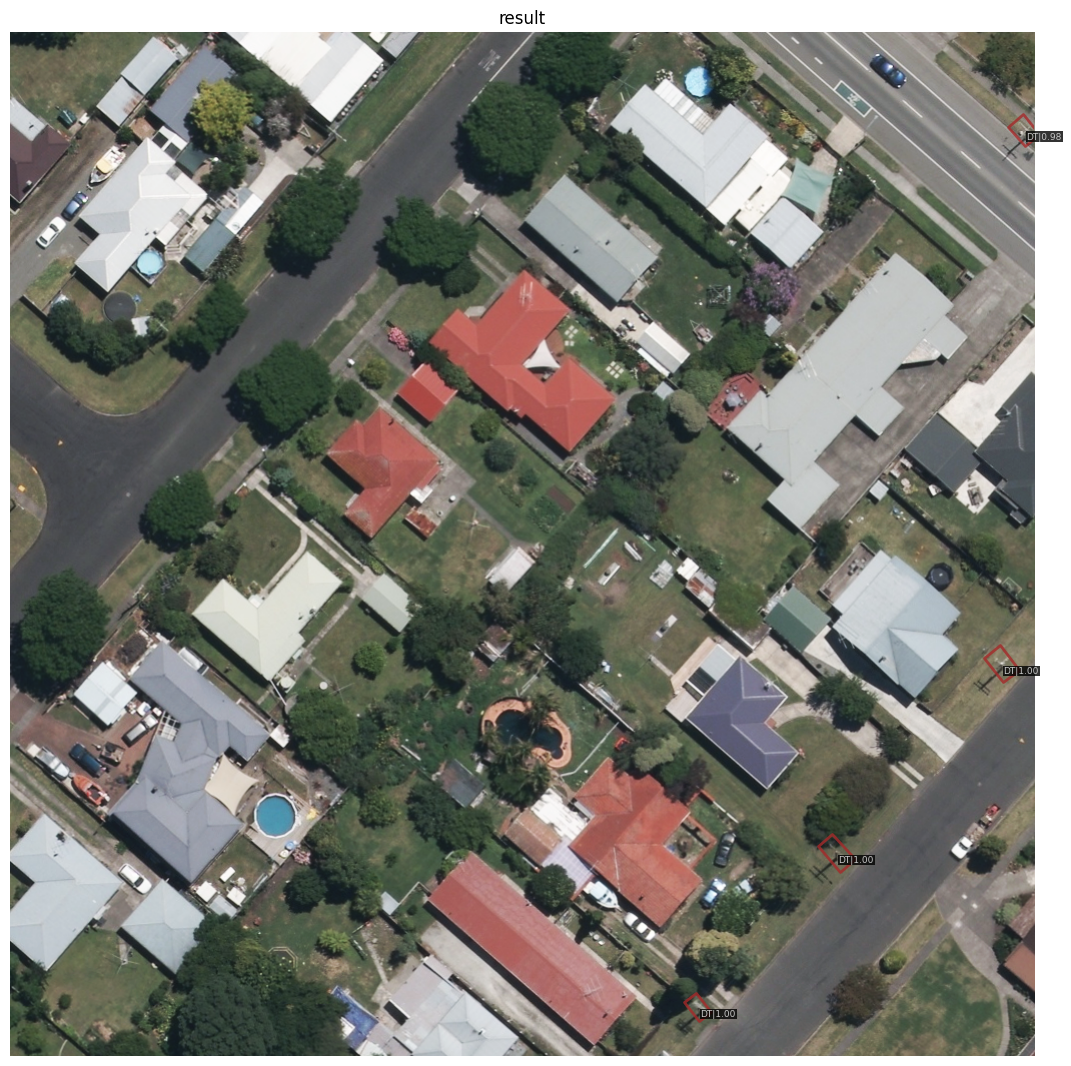

In [6]:
show_result_pyplot(model, img, result, score_thr=0.3, palette='dota')

In [8]:
import mmcv
from mmrotate.datasets import build_dataset
from mmdet.apis import inference_detector, show_result_pyplot
from mmrotate.models import build_detector
import cv2
# Load your config file
cfg = mmcv.Config.fromfile('configs\custom\lsknet_custom.py')

# Build the dataset
dataset = build_dataset(cfg.data.test)

# Index of the image you want to visualize
index = 0
img_info = dataset.data_infos[index]

# Load the image
img = mmcv.imread(img_info['filename'])

# Get the ground truth annotations
gt_bboxes = dataset.get_ann_info(index)['bboxes']
gt_labels = dataset.get_ann_info(index)['labels']

# Draw the bounding boxes on the image
img_with_boxes = img.copy()
for bbox in gt_bboxes:
    # Convert the rotated bounding box to a polygon
    polygon = cv2.boxPoints(((bbox[0], bbox[1]), (bbox[2], bbox[3]), bbox[4]))
    polygon = polygon.astype(int)
    cv2.polylines(img_with_boxes, [polygon], True, (255, 0, 0), thickness=2)

# Visualize the image with bounding boxes
mmcv.imshow(img_with_boxes, 'Ground Truth')

ImportError: cannot import name 'inference_detector' from 'mmrotate.apis' (c:\Users\CanAliYarman\Documents\lsknet-test\LSKNet\mmrotate\apis\__init__.py)